In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'Big Mart Sales.csv')
test=pd.read_csv(r'test.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data.shape,test.shape

((8523, 12), (5681, 11))

In [9]:
data.isnull().sum()/len(data)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
data['Item_Weight'].mean()

12.857645184136183

In [11]:
ls=[]
ls=data[data['Item_Weight'].isnull()]['Item_Weight'].index
ls

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [12]:
data['Item_Weight'][ls]=data['Item_Weight'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data.drop('Outlet_Size',axis=1,inplace=True)

In [14]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
ls=[]
ls=test[test['Item_Weight'].isnull()]['Item_Weight'].index
ls

Int64Index([   4,    7,   12,   18,   23,   30,   33,   35,   36,   39,
            ...
            5627, 5634, 5640, 5643, 5648, 5655, 5656, 5661, 5665, 5669],
           dtype='int64', length=976)

In [16]:
test['Item_Weight'][ls]=test['Item_Weight'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].astype(object)

In [25]:
test['Outlet_Establishment_Year']=test['Outlet_Establishment_Year'].astype(object)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null object
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), object(8)
memory usage: 488.3+ KB


# Exploratry Data Analysis

In [24]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [29]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
data.groupby('Item_Identifier').count()

In [38]:
data['Item_Fat_Content'].mode()

0    Low Fat
dtype: object

# Outlier

In [18]:
conti=data.select_dtypes(include=np.number)

In [19]:
conti.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


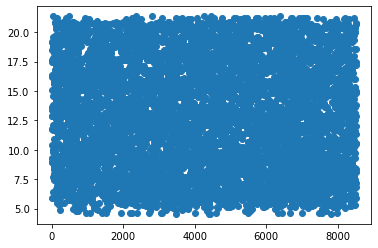

In [20]:
plt.scatter(data['Item_Weight'].index,data['Item_Weight'])

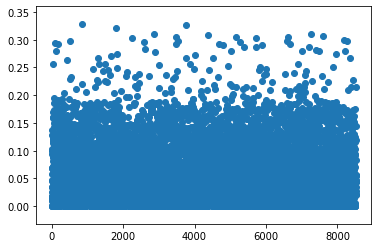

In [21]:
plt.scatter(data['Item_Visibility'].index,data['Item_Visibility'])

In [22]:
out_ls=[]
out_ls=data[data['Item_Visibility']>0.3].index

In [23]:
data['Item_Visibility'][out_ls]=data.drop(out_ls).mean()['Item_Visibility']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


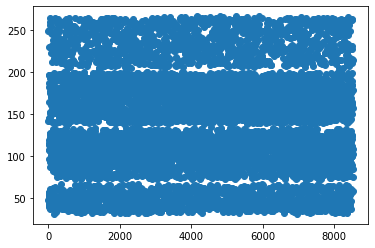

In [24]:
plt.scatter(data['Item_MRP'].index,data['Item_MRP'])

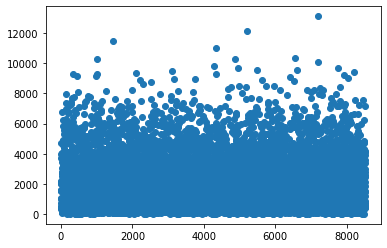

In [25]:
plt.scatter(data['Item_Outlet_Sales'].index,data['Item_Outlet_Sales'])

In [26]:
out_ls=[]
out_ls=data[data['Item_Outlet_Sales']>10000].index
out_ls

Int64Index([1009, 1450, 4349, 4888, 5223, 6541, 7188, 7191], dtype='int64')

In [27]:
data['Item_Outlet_Sales'][out_ls]=data.drop(out_ls).mean()['Item_Outlet_Sales']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


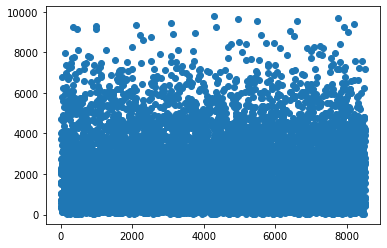

In [29]:
plt.scatter(data['Item_Outlet_Sales'].index,data['Item_Outlet_Sales'])

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data.columns:
    if isinstance(data[i][0],str):
        data[i]=encoder.fit_transform(data[i])
        

In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,2,1,994.7052


In [33]:
name=data.columns

In [34]:
from sklearn.preprocessing import StandardScaler
st_scale=StandardScaler()

In [35]:
x=st_scale.fit_transform(data)

In [36]:
S_data=pd.DataFrame(x,columns=name)

In [37]:
S_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.388514,-0.841872,-0.572844,-0.979739,-0.766479,1.747454,1.507813,0.139541,-1.369334,-0.252658,0.927532
1,-1.717991,-1.641706,0.978092,-0.916099,1.608963,-1.489023,-0.607071,1.334103,1.091569,1.002972,-1.026879
2,-0.262057,1.098554,-0.572844,-0.965700,0.658786,0.010040,1.507813,0.139541,-1.369334,-0.252658,-0.044930
3,0.759769,1.500838,0.978092,-1.295829,-0.291391,0.660050,-1.664513,0.020085,1.091569,-1.508289,-0.855315
4,1.151580,-0.929428,-0.572844,-1.295829,0.421242,-1.399220,-1.312032,-1.293934,1.091569,-0.252658,-0.699563


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C70A2B0408>,
      dtype=object)

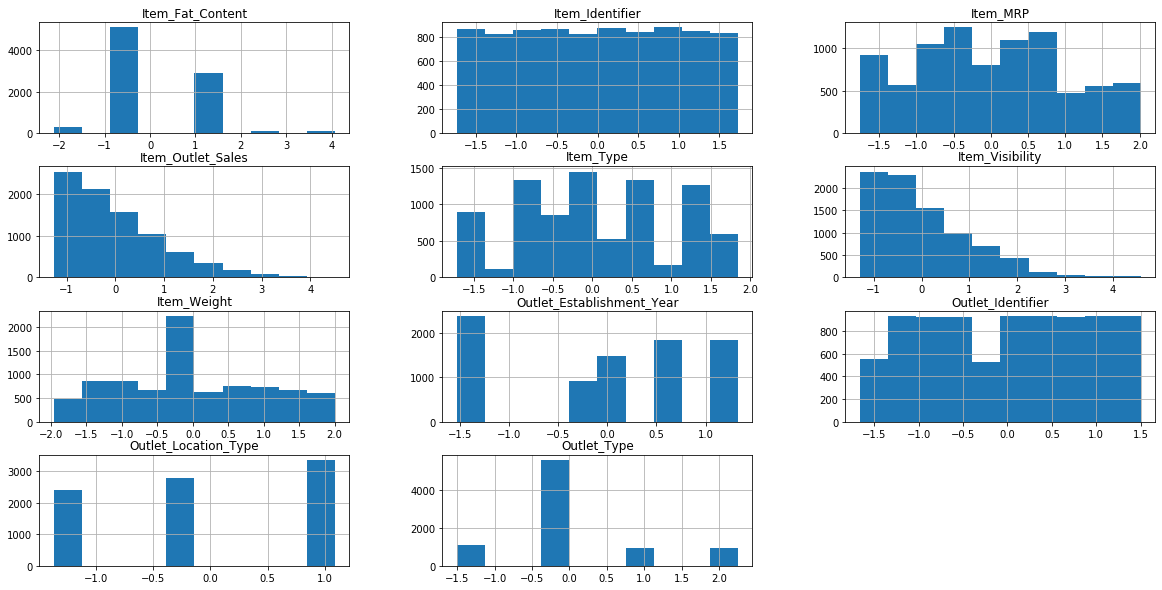

In [38]:
S_data.hist(figsize=(20,10))

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
rc=S_data.drop('Item_Outlet_Sales',axis=1)
re=S_data.Item_Outlet_Sales

In [41]:
train_x,test_x,train_y,test_y=train_test_split(rc.iloc[:,0].values.reshape(-1,1),re,test_size=.3,)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()

In [44]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
pred=model.predict(test_x)

In [46]:
model.score(test_x,pred)*100

100.0

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(test_y,pred)

-0.0003894402011743736